# ReEDS Scenarios on PV ICE Tool STATES

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. ReEDS installation projections are used in this journal as input data to the PV ICE tool. 

Current sections include:

<ol>
    <li> ### Reading a standard ReEDS output file and saving it in a PV ICE input format </li>
<li>### Reading scenarios of interest and running PV ICE tool </li>
<li>###Plotting </li>
<li>### GeoPlotting.</li>
</ol>
    Notes:
   
Scenarios of Interest:
	the Ref.Mod, 
o	95-by-35.Adv, and 
o	95-by-35+Elec.Adv+DR ones


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


### Reading REEDS original file to get list of SCENARIOs, PCAs, and STATEs 

In [3]:
reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx')
print ("Input file is stored in %s" % reedsFile)

rawdf = pd.read_excel(reedsFile,
                        sheet_name="UPV Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
#rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True)
rawdf.set_index(['Scenario','Year','PCA', 'State'], inplace=True)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v2a.xlsx


In [4]:
scenarios = list(rawdf.index.get_level_values('Scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
STATEs = list(rawdf.index.get_level_values('State').unique())

### Reading GIS inputs

In [5]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [6]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [7]:
GIS.loc['p1'].long

-121.4522522

### Create Scenarios in PV_ICE

#### Rename difficult characters from Scenarios Names

In [8]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
simulationname

['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

#### Downselect to Solar Future scenarios of interest

Scenarios of Interest:
<li> Ref.Mod
<li> 95-by-35.Adv  
<li> 95-by-35+Elec.Adv+DR 

In [9]:
SFscenarios = [simulationname[0], simulationname[4], simulationname[8]]
SFscenarios

['Reference.Mod', '95-by-35.Adv', '95-by-35_Elec.Adv_DR']

#### Create the 3 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [10]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)    
    r1.createScenario(name=STATEs[jj], file=filetitle)
    r1.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r1.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r2.createScenario(name=STATEs[jj], file=filetitle)
    r2.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r2.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


i = 2
r3 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)
for jj in range (0, len(STATEs)): 
    filetitle = SFscenarios[i]+'_'+STATEs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'STATEs', filetitle)        
    r3.createScenario(name=STATEs[jj], file=filetitle)
    r3.scenario[STATEs[jj]].addMaterial('glass', file=r'..\baselines\ReedsSubset\baseline_material_glass_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silicon', file=r'..\baselines\ReedsSubset\baseline_material_silicon_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('silver', file=r'..\baselines\ReedsSubset\baseline_material_silver_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('copper', file=r'..\baselines\ReedsSubset\baseline_material_copper_Reeds.csv')
    r3.scenario[STATEs[jj]].addMaterial('aluminum', file=r'..\baselines\ReedsSubset\baseline_material_aluminium_Reeds.csv')


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP
path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


# 2 FINISH: Set characteristics of Recycling to SF values.

In [11]:
#r1.scenario[]

#### Calculate Mass Flow

In [12]:
IRENA= True

if IRENA:
    weibullInputParams = {'alpha': 5.3759}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    r2.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
    r3.calculateMassFlow(weibullInputParams=weibullInputParams, weibullAlphaOnly=True)
else:
    r1.calculateMassFlow()
    r2.calculateMassFlow()
    r3.calculateMassFlow()

Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  VA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  FL
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Materia

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  TX
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  OK
********************
Finished Area+Power Generatio

==> Working on Material :  aluminum
Working on Scenario:  VT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NH
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CT
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Mater

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NC
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  CA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminu

==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  NE
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  MN
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  IA
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
==> Working on Material :  silver
==> Working on Material :  copper
==> Working on Material :  aluminum
Working on Scenario:  WI
********************
Finished Area+Power Generatio

In [13]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[STATEs[jj]].data.keys())
print("Material Keys: ", r1.scenario[STATEs[jj]].material['glass'].materialdata.keys())

PCAs: dict_keys(['WA', 'CA', 'VA', 'FL', 'MI', 'IN', 'KY', 'OH', 'PA', 'WV', 'NV', 'MD', 'DE', 'NJ', 'NY', 'VT', 'NH', 'MA', 'CT', 'RI', 'ME', 'ID', 'MT', 'WY', 'UT', 'AZ', 'NM', 'SD', 'CO', 'ND', 'NE', 'MN', 'IA', 'WI', 'TX', 'OK', 'OR', 'KS', 'MO', 'AR', 'LA', 'IL', 'MS', 'AL', 'TN', 'GA', 'SC', 'NC'])
Module Keys: Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'WeibullParams', 'EOL_on_Year_0',
       'EOL_on_Year_1', 'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4',
       'EOL_on_Year_5', 'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8',
       'EOL_on_Year_9', 'EOL_on_

In [14]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.scenario['p1'].data.head(21)
r2.scenario['p1'].data.head(21)
r3.scenario['p1'].data.head(21)
"""
pass

## Aggregating PCAs Material Landfilled to obtain US totals by Year

In [15]:
### Singe Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
#keyword='new_Installed_Capacity_[MW]'

plt.figure()
plt.plot(r1.scenario[PCAs[0]].data['year'], foo, label=PCAs[12])
plt.title(keyword)
plt.legend()

for jj in range (1, len(PCAs)): 
    foo['silver'] += r1.scenario[PCAs[jj]].material['silver'].materialdata[keyword]


fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.plot(r1.scenario[PCAs[0]].data['year'], foo['silver'], label='US')
plt.title("Material Landfilled per Year US")
#ax.set_yscale('log')
print(max(foo))
"""
pass

In [16]:
### Verbose Material Example Aggregating PCAs to obtain US Total

"""
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearlyWASTE=pd.DataFrame()

# Loop over Materials
for ii in range (0, len(materials)):    
    material = materials[ii]
    foo1 = r1.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo1 = foo1.to_frame(name=material)
    foo2 = r2.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo2 = foo2.to_frame(name=material)
    foo3 = r3.scenario[PCAs[0]].material[material].materialdata[keyword].copy()
    foo3 = foo3.to_frame(name=material)

    USyearlyWASTE[r1.name + '_' + material] = foo1[material]
    USyearlyWASTE[r2.name + '_' + material] = foo2[material]
    USyearlyWASTE[r3.name + '_' + material] = foo3[material]

    # Loop over PCAs
    for jj in range (1, len(PCAs)): 
        USyearlyWASTE[r1.name + '_' + material] += r1.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r2.name + '_' + material] += r2.scenario[PCAs[jj]].material[material].materialdata[keyword]
        USyearlyWASTE[r3.name + '_' + material] += r3.scenario[PCAs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
USyearlyWASTE = USyearlyWASTE/907185
USyearlyWASTE.head(20)
"""
pass

In [17]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

USyearly=pd.DataFrame()

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["Waste_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]

# Converting to grams to Tons. 
#USyearly = USyearly/907185
USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,Waste_glass_95-by-35_Elec.Adv_DR,Waste_silicon_95-by-35_Elec.Adv_DR,Waste_silver_95-by-35_Elec.Adv_DR,Waste_copper_95-by-35_Elec.Adv_DR,Waste_aluminum_95-by-35_Elec.Adv_DR
0,1.677604e+09,6.455695e+08,4.493061e+06,4.193524e+05,0.000000e+00,1.677604e+09,6.455695e+08,4.493061e+06,4.193524e+05,0.000000e+00,1.677604e+09,6.455695e+08,4.493061e+06,4.193524e+05,0.000000e+00
1,1.542129e+09,2.942330e+08,2.106274e+06,4.082438e+05,8.044633e+00,1.542129e+09,2.942330e+08,2.106274e+06,4.082438e+05,8.044633e+00,1.542129e+09,2.942330e+08,2.106274e+06,4.082438e+05,8.044633e+00
2,1.864616e+10,3.511463e+09,2.122278e+07,4.936147e+06,3.418829e+02,1.864616e+10,3.511463e+09,2.122278e+07,4.936147e+06,3.418829e+02,1.864616e+10,3.511463e+09,2.122278e+07,4.936147e+06,3.418829e+02
3,1.794695e+10,3.521241e+09,1.634161e+07,4.751058e+06,3.374240e+03,1.794695e+10,3.521241e+09,1.634161e+07,4.751058e+06,3.374240e+03,1.794695e+10,3.521241e+09,1.634161e+07,4.751058e+06,3.374240e+03
4,5.755242e+10,1.115844e+10,3.815959e+07,1.584892e+07,2.077051e+04,5.755242e+10,1.115844e+10,3.815959e+07,1.584892e+07,2.077051e+04,5.755242e+10,1.115844e+10,3.815959e+07,1.584892e+07,2.077051e+04
5,5.626525e+10,1.060837e+10,3.397622e+07,1.519674e+07,9.840117e+04,5.626525e+10,1.060837e+10,3.397622e+07,1.519674e+07,9.840117e+04,5.626525e+10,1.060837e+10,3.397622e+07,1.519674e+07,9.840117e+04
6,1.190607e+11,2.359635e+10,6.499933e+07,3.699210e+07,3.771350e+05,1.190607e+11,2.359635e+10,6.499933e+07,3.699210e+07,3.771350e+05,1.190607e+11,2.359635e+10,6.499933e+07,3.699210e+07,3.771350e+05
7,1.099225e+11,2.078991e+10,5.830033e+07,3.918289e+07,1.223681e+06,1.099225e+11,2.078991e+10,5.830033e+07,3.918289e+07,1.223681e+06,1.099225e+11,2.078991e+10,5.830033e+07,3.918289e+07,1.223681e+06
8,1.465508e+11,2.332919e+10,8.280012e+07,6.497664e+07,3.473429e+06,1.465508e+11,2.332919e+10,8.280012e+07,6.497664e+07,3.473429e+06,1.465508e+11,2.332919e+10,8.280012e+07,6.497664e+07,3.473429e+06
9,1.494519e+11,1.829102e+10,8.394912e+07,6.446703e+07,8.850556e+06,1.494519e+11,1.829102e+10,8.394912e+07,6.446703e+07,8.850556e+06,1.494519e+11,1.829102e+10,8.394912e+07,6.446703e+07,8.850556e+06


In [18]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    for ii in range (0, len(materials)):    
        material = materials[ii]
        foo = obj.scenario[STATEs[0]].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+obj.name] = foo[material]

        # Loop over STATEs
        for jj in range (1, len(STATEs)): 
            USyearly["VirginStock_"+material+'_'+obj.name] += obj.scenario[STATEs[jj]].material[material].materialdata[keyword]



### Converting to grams to Tons. 


In [19]:
USyearly = USyearly/907185


### Adding Installed Capacity to US

In [20]:
keyword='Installed_Capacity_[W]'

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    # Loop over Materials
    foo = obj.scenario[STATEs[0]].data[keyword]
    foo = foo.to_frame(name=keyword)
    USyearly["Capacity_"+obj.name] = foo[keyword]

    # Loop over STATEs
    for jj in range (1, len(STATEs)): 
        USyearly["Capacity_"+obj.name] += obj.scenario[STATEs[jj]].data[keyword]

USyearly.head(20)

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,...,VirginStock_copper_95-by-35.Adv,VirginStock_aluminum_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
0,1849.241366,711.618353,4.952751,0.462257,0.000000,1.849241e+03,711.618353,4.952751,0.462257,0.000000,...,4.622567,773.867311,8.040180e+03,1036.039007,24.763754,4.622567,773.867311,1.039020e+08,1.039020e+08,1.039020e+08
1,1699.906257,324.336261,2.321769,0.450012,0.000009,1.699906e+03,324.336261,2.321769,0.450012,0.000009,...,4.500115,753.367514,7.726846e+03,640.162987,11.608844,4.500115,753.367514,2.070834e+08,2.070834e+08,2.070834e+08
2,20553.863414,3870.724452,23.394100,5.441169,0.000377,2.055386e+04,3870.724452,23.394100,5.441169,0.000377,...,54.411674,9109.097222,9.342664e+04,7689.440032,116.970450,54.411674,9109.097222,1.486954e+09,1.486954e+09,1.486954e+09
3,19783.120390,3881.502697,18.013538,5.237144,0.003719,1.978312e+04,3881.502697,18.013538,5.237144,0.003719,...,52.371236,8767.506076,8.992314e+04,7557.015035,90.067247,52.371236,8767.506076,2.758625e+09,2.758625e+09,2.758625e+09
4,63440.666334,12300.067457,42.063740,17.470444,0.022896,6.344067e+04,12300.067457,42.063740,17.470444,0.022896,...,174.703204,29247.188202,3.020975e+05,24561.064097,210.316319,174.703204,29247.188202,7.097582e+09,7.097582e+09,7.097582e+09
5,62021.806136,11693.727473,37.452356,16.751537,0.108469,6.202181e+04,11693.727473,37.452356,16.751537,0.108469,...,167.509543,28042.892218,2.953378e+05,23449.823276,187.252218,167.509543,28042.892218,1.141305e+10,1.141305e+10,1.141305e+10
6,131241.946454,26010.511282,71.649475,40.776799,0.415720,1.312419e+05,26010.511282,71.649475,40.776799,0.415720,...,407.745637,63400.298726,6.561931e+05,52589.010236,358.215856,407.745637,63400.298726,2.148915e+10,2.148915e+10,2.148915e+10
7,121168.755090,22916.946460,64.265091,43.191731,1.348877,1.211688e+05,22916.946460,64.265091,43.191731,1.348877,...,431.844787,62683.911170,6.376734e+05,49194.730224,321.236005,431.844787,62683.911170,3.151948e+10,3.151948e+10,3.151948e+10
8,161544.508852,25716.020141,91.271485,71.624461,3.828799,1.615445e+05,25716.020141,91.271485,71.624461,3.828799,...,716.038645,89457.120222,8.972986e+05,63216.628971,456.131826,716.038645,89457.120222,4.641141e+10,4.641141e+10,4.641141e+10
9,164742.445054,20162.394065,92.538038,71.062719,9.756066,1.647424e+05,20162.394065,92.538038,71.062719,9.756066,...,710.101343,85729.740213,9.147991e+05,55380.797254,462.172654,710.101343,85729.740213,6.124483e+10,6.124483e+10,6.124483e+10


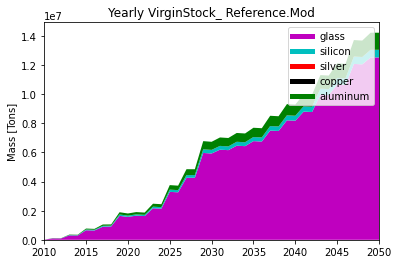

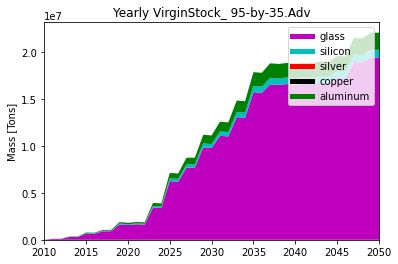

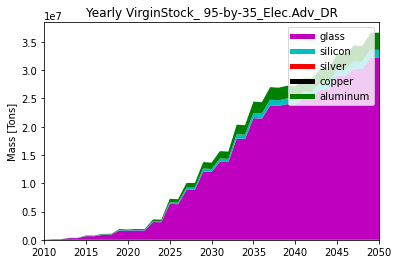

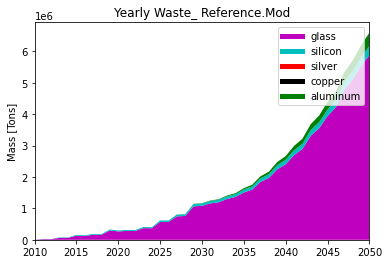

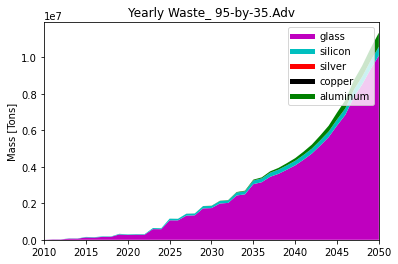

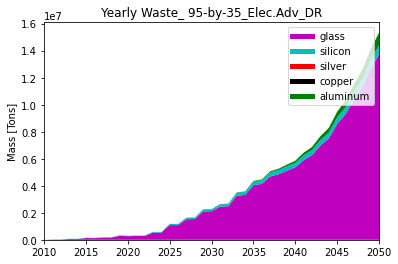

In [21]:
keywords=['VirginStock_', 'Waste_', 'Capacity']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        obj = SFScenarios[kk]
        plt.figure()
        plt.plot([],[],color='m', label='glass', linewidth=5)
        plt.plot([],[],color='c', label='silicon', linewidth=5)
        plt.plot([],[],color='r', label='silver', linewidth=5)
        plt.plot([],[],color='k', label='copper', linewidth=5)
        plt.plot([],[],color='g', label='aluminum', linewidth=5)

        plt.stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['m','c','r','k', 'g'])
        plt.ylabel('Mass [Tons]')
        plt.xlim([2010, 2050])
        plt.title('Yearly '+keyw+ ' ' + obj.name)
        plt.legend(materials)


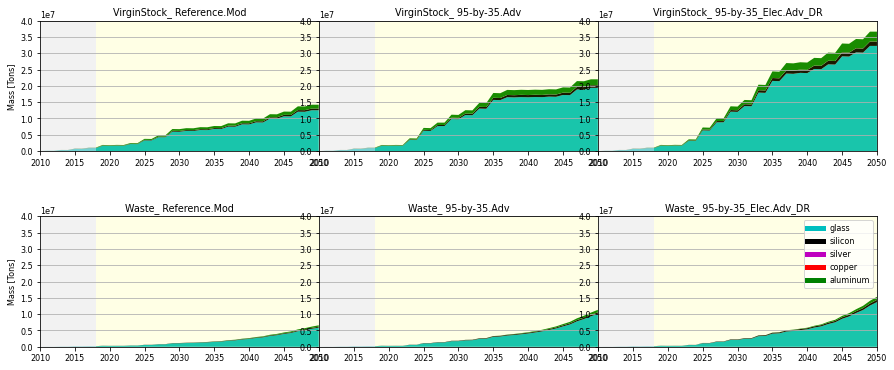

In [22]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 
       
for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [23]:
USyearly.keys()

Index(['Waste_glass_Reference.Mod', 'Waste_silicon_Reference.Mod',
       'Waste_silver_Reference.Mod', 'Waste_copper_Reference.Mod',
       'Waste_aluminum_Reference.Mod', 'Waste_glass_95-by-35.Adv',
       'Waste_silicon_95-by-35.Adv', 'Waste_silver_95-by-35.Adv',
       'Waste_copper_95-by-35.Adv', 'Waste_aluminum_95-by-35.Adv',
       'Waste_glass_95-by-35_Elec.Adv_DR',
       'Waste_silicon_95-by-35_Elec.Adv_DR',
       'Waste_silver_95-by-35_Elec.Adv_DR',
       'Waste_copper_95-by-35_Elec.Adv_DR',
       'Waste_aluminum_95-by-35_Elec.Adv_DR',
       'VirginStock_glass_Reference.Mod', 'VirginStock_silicon_Reference.Mod',
       'VirginStock_silver_Reference.Mod', 'VirginStock_copper_Reference.Mod',
       'VirginStock_aluminum_Reference.Mod', 'VirginStock_glass_95-by-35.Adv',
       'VirginStock_silicon_95-by-35.Adv', 'VirginStock_silver_95-by-35.Adv',
       'VirginStock_copper_95-by-35.Adv', 'VirginStock_aluminum_95-by-35.Adv',
       'VirginStock_glass_95-by-35_Elec.Adv_DR',
 

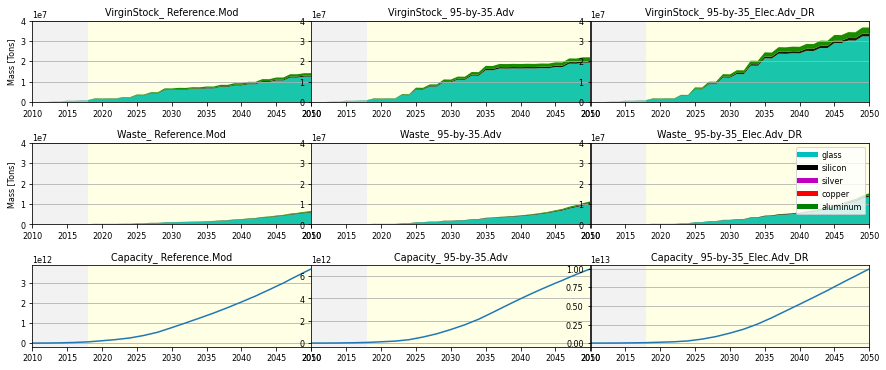

In [24]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                          USyearly[keyw+materials[1]+'_'+obj.name], 
                                                          USyearly[keyw+materials[2]+'_'+obj.name], 
                                                          USyearly[keyw+materials[3]+'_'+obj.name], 
                                                          USyearly[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

        
# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 




for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([0, 4e7])

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
        

In [25]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

,Waste_glass_Reference.Mod,Waste_silicon_Reference.Mod,Waste_silver_Reference.Mod,Waste_copper_Reference.Mod,Waste_aluminum_Reference.Mod,Waste_glass_95-by-35.Adv,Waste_silicon_95-by-35.Adv,Waste_silver_95-by-35.Adv,Waste_copper_95-by-35.Adv,Waste_aluminum_95-by-35.Adv,...,VirginStock_copper_95-by-35.Adv,VirginStock_aluminum_95-by-35.Adv,VirginStock_glass_95-by-35_Elec.Adv_DR,VirginStock_silicon_95-by-35_Elec.Adv_DR,VirginStock_silver_95-by-35_Elec.Adv_DR,VirginStock_copper_95-by-35_Elec.Adv_DR,VirginStock_aluminum_95-by-35_Elec.Adv_DR,Capacity_Reference.Mod,Capacity_95-by-35.Adv,Capacity_95-by-35_Elec.Adv_DR
0,1849.241366,711.618353,4.952751,0.462257,0.000000,1849.241366,711.618353,4.952751,0.462257,0.000000,...,4.622567,773.867311,8040.179852,1036.039007,24.763754,4.622567,773.867311,1.039020e+08,1.039020e+08,1.039020e+08
1,3549.147623,1035.954614,7.274520,0.912268,0.000009,3549.147623,1035.954614,7.274520,0.912268,0.000009,...,9.122683,1527.234825,15767.026154,1676.201993,36.372598,9.122683,1527.234825,3.109855e+08,3.109855e+08,3.109855e+08
2,24103.011037,4906.679066,30.668619,6.353438,0.000386,24103.011037,4906.679066,30.668619,6.353438,0.000386,...,63.534357,10636.332048,109193.664332,9365.642025,153.343048,63.534357,10636.332048,1.797939e+09,1.797939e+09,1.797939e+09
3,43886.131427,8788.181763,48.682158,11.590581,0.004105,43886.131427,8788.181763,48.682158,11.590581,0.004105,...,115.905593,19403.838124,199116.803578,16922.657060,243.410295,115.905593,19403.838124,4.556565e+09,4.556565e+09,4.556565e+09
4,107326.797761,21088.249219,90.745897,29.061025,0.027001,107326.797761,21088.249219,90.745897,29.061025,0.027001,...,290.608797,48651.026327,501214.342480,41483.721157,453.726614,290.608797,48651.026327,1.165415e+10,1.165415e+10,1.165415e+10


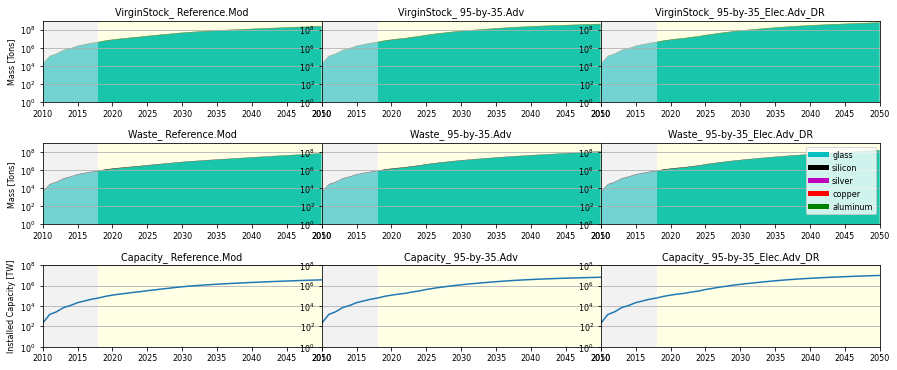

In [26]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_', 'Waste_', 'Capacity_']
SFScenarios = [r1, r2, r3]
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

    
fig, axs = plt.subplots(3,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
i = 0

# Loop over Keywords
for ii in range(0, 2):
    keyw = keywords[ii]
    # Loop over SF Scenarios
    for kk in range(0, 3):
        
        obj = SFScenarios[kk]
        axs[i].yaxis.grid()
        axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
        axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
        axs[i].plot([],[],color='c', label='glass', linewidth=5)
        axs[i].plot([],[],color='k', label='silicon', linewidth=5)
        axs[i].plot([],[],color='m', label='silver', linewidth=5)
        axs[i].plot([],[],color='r', label='copper', linewidth=5)
        axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

        axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                          UScum[keyw+materials[1]+'_'+obj.name], 
                                                          UScum[keyw+materials[2]+'_'+obj.name], 
                                                          UScum[keyw+materials[3]+'_'+obj.name], 
                                                          UScum[keyw+materials[4]+'_'+obj.name], 
                                                          colors=['c','k','m','r', 'g'])
        #axs[i].ylabel('Mass [Tons]')
        axs[i].set_xlim([2010, 2050])
        axs[i].set_title(keyw+ ' ' + obj.name)
        #axs[i].legend(materials)
        
        i += 1 

# CAPACITY IS BY MODULE NOT MATERIAL:
ii = 2
keyw = keywords[ii]

# Loop over SF Scenarios
for kk in range(0, 3):
    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    #axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+obj.name]/1e6)
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' ' + obj.name)
    #axs[i].legend(materials)
    i += 1 
    
for i in range (0, 3):
    axs[i].set_ylim([1e0, 10e8])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 10e7])

    axs[i].set_yscale('log')
    axs[i+3].set_yscale('log')
    axs[i+6].set_yscale('log')
    
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[6].set_ylabel('Installed Capacity [TW]')
axs[5].legend(materials)


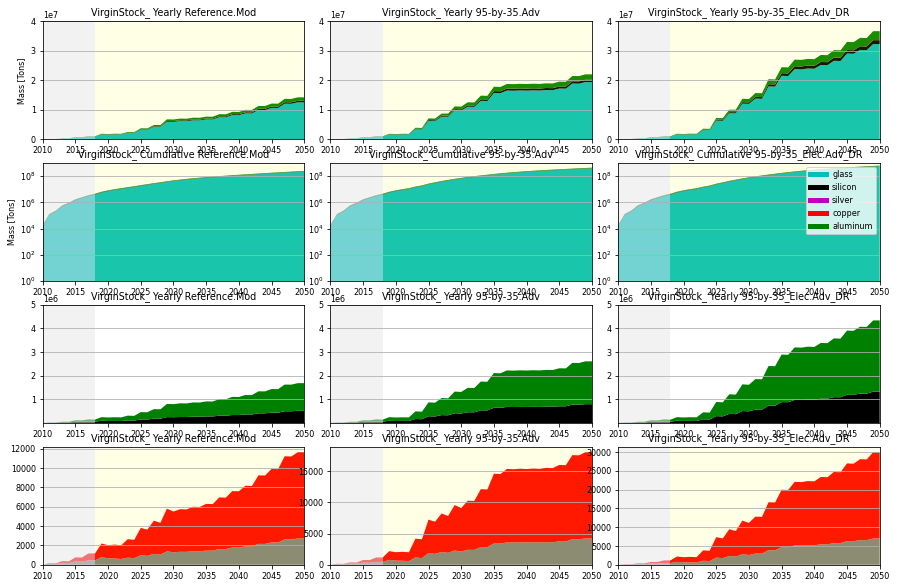

In [74]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(4,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.1)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot([],[],color='k', label='silicon', linewidth=5)
    axs[i].plot([],[],color='m', label='silver', linewidth=5)
    axs[i].plot([],[],color='r', label='copper', linewidth=5)
    axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','m','r', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)

    i += 1 


# ROW 2:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    axs[i].plot([],[],color='c', label='glass', linewidth=5)
    axs[i].plot([],[],color='k', label='silicon', linewidth=5)
    axs[i].plot([],[],color='m', label='silver', linewidth=5)
    axs[i].plot([],[],color='r', label='copper', linewidth=5)
    axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], UScum[keyw+materials[0]+'_'+obj.name], 
                                                      UScum[keyw+materials[1]+'_'+obj.name], 
                                                      UScum[keyw+materials[2]+'_'+obj.name], 
                                                      UScum[keyw+materials[3]+'_'+obj.name], 
                                                      UScum[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','m','r', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' Cumulative ' + obj.name)
    #axs[i].legend(materials)

    i += 1 


# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].plot([],[],color='k', label='silicon', linewidth=5)
    axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['k','g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)

    i += 1 
    
# ROW 4:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
    axs[i].plot([],[],color='m', label='silver', linewidth=5)
    axs[i].plot([],[],color='r', label='copper', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      colors=['m','r'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2010, 2050])
    axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)

    i += 1 
    
    

for i in range (0, 3):
    axs[i].set_ylim([0, 4e7])
    axs[i+3].set_ylim([1e0, 10e8])
    axs[i+6].set_ylim([1e0, 5e6])

    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)
    
axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
axs[5].legend(materials)


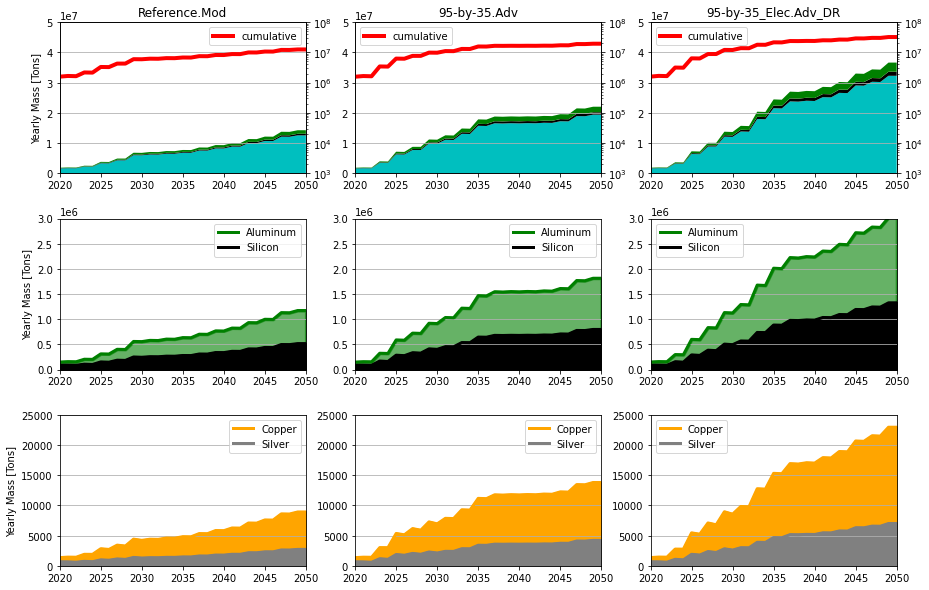

In [95]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (12, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, axs = plt.subplots(3,3, figsize=(15, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .3, wspace=.2)
axs = axs.ravel()
i = 0

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)
#    axs[i].axvspan(2018, 2050.5, facecolor='yellow', alpha=0.1)
 #   axs[i].plot([],[],color='c', label='glass', linewidth=5)
 #   axs[i].plot([],[],color='k', label='silicon', linewidth=5)
 #   axs[i].plot([],[],color='m', label='silver', linewidth=5)
 #   axs[i].plot([],[],color='r', label='copper', linewidth=5)
 #   axs[i].plot([],[],color='g', label='aluminum', linewidth=5)

    axs[i].stackplot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
                                                      USyearly[keyw+materials[1]+'_'+obj.name], 
                                                      USyearly[keyw+materials[2]+'_'+obj.name], 
                                                      USyearly[keyw+materials[3]+'_'+obj.name], 
                                                      USyearly[keyw+materials[4]+'_'+obj.name], 
                                                      colors=['c','k','gray','orange', 'g'])
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    axs[i].set_title(obj.name)
    #axs[i].legend(materials)

    i += 1 

# 2nd axis plot
i = 0
for kk in range(0, 3):

    obj = SFScenarios[kk]
    ax2=axs[i].twinx()
    ax2.plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[0]+'_'+obj.name], 
             color = 'r', linewidth=4.0, label='cumulative')
    #axs[i].ylabel('Mass [Tons]')
 #   axs[i].set_xlim([2010, 2050])
  #  axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    ax2.set_yscale('log')
    ax2.set_ylim([1e3, 1e8])
    i += 1 

    ax2.legend()


i = 3
# ROW 2:
# Loop over SF Scenarios
for kk in range(0, 3):


    obj = SFScenarios[kk]
    axs[i].yaxis.grid()
#    axs[i].axvspan(2000, 2018, facecolor='0.9', alpha=0.5)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[4]+'_'+obj.name], color='g', lw=3, label='Aluminum')
    axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[4]+'_'+obj.name], 
                    color='g', lw=3, alpha=.6)
    
    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[1]+'_'+obj.name], color='k', lw=3, label='Silicon')
    axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[1]+'_'+obj.name], 
                    color='k', lw=3)# alpha=.3)


    # silicon aluminum 'k ''g'
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    #axs[i].legend(materials)
    axs[i].legend()

    i += 1 



# ROW 3:
# Loop over SF Scenarios
for kk in range(0, 3):

    obj = SFScenarios[kk]
    axs[i].yaxis.grid()

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[3]+'_'+obj.name], color='orange', lw=3, label='Copper')
    axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[3]+'_'+obj.name], 
                    color='orange', lw=3)# alpha=.3)

    axs[i].plot(obj.scenario[STATEs[0]].data['year'], USyearly[keyw+materials[2]+'_'+obj.name], color='gray', lw=3, label='Silver')
    axs[i].fill_between(obj.scenario[STATEs[0]].data['year'], 0, USyearly[keyw+materials[2]+'_'+obj.name], 
                    color='gray', lw=3)# , alpha=.6)
    
    
    #axs[i].ylabel('Mass [Tons]')
    axs[i].set_xlim([2020, 2050])
    #axs[i].set_title(keyw+ ' Yearly ' + obj.name)
    axs[i].legend()

    i += 1 
    
    

for i in range (0, 3):
    axs[i].set_ylim([0, 5e7])
    axs[i+3].set_ylim([0, 3e6])
    axs[i+6].set_ylim([0, 2.5e4])

    #axs[i+3].set_ylim([1e0, 10e8])
    #axs[i+6].set_ylim([1e0, 5e6])

#    axs[i+3].set_yscale('log')
#    axs[i+6].set_yscale('log')

axs[0].set_ylabel('Mass [Tons]')
axs[3].set_ylabel('Mass [Tons]')
#axs[5].legend(materials)
    
axs[0].set_ylabel('Yearly Mass [Tons]')
axs[3].set_ylabel('Yearly Mass [Tons]')
axs[6].set_ylabel('Yearly Mass [Tons]')

#axs[8].legend(materials)

fig.savefig('FIGURE_1_MaterialNeeds.png', dpi=600)

In [136]:
materials = ['glass', 'aluminum', 'copper', 'silicon', 'silver']

#Loop over scenarios
for kk in range (0, 3):
    obj = SFScenarios[kk]
    print("SCENARIO :", obj.name)
    modulemat = 0
    for ii in range(0, len(materials)):
        installedmat = (UScum['VirginStock_'+materials[ii]+'_'+obj.name][21]-
              UScum['Waste_'+materials[ii]+'_'+obj.name][21])
        modulemat +=installedmat
        print(materials[ii], ':', round(installedmat/1000)*1000, 'tons')

    print('Module :', round(modulemat/1000)*1000, 'tons') 
    print("Capacity in Year 2030 [GW]:", round(USyearly['Capacity_'+obj.name][21]/1e9))
    print("****************************")

SCENARIO : Reference.Mod
glass : 34282000 tons
aluminum : 3901000 tons
copper : 30000 tons
silicon : 1332000 tons
silver : 10000 tons
Module : 39555000 tons
Capacity in Year 2030 [GW]: 773
****************************
SCENARIO : 95-by-35.Adv
glass : 53248000 tons
aluminum : 6047000 tons
copper : 46000 tons
silicon : 2030000 tons
silver : 15000 tons
Module : 61386000 tons
Capacity in Year 2030 [GW]: 1216
****************************
SCENARIO : 95-by-35_Elec.Adv_DR
glass : 58716000 tons
aluminum : 6664000 tons
copper : 50000 tons
silicon : 2225000 tons
silver : 16000 tons
Module : 67672000 tons
Capacity in Year 2030 [GW]: 1346
****************************


## DWARAKS PLOT

Text(0, 0.5, 'Mass [tons]')

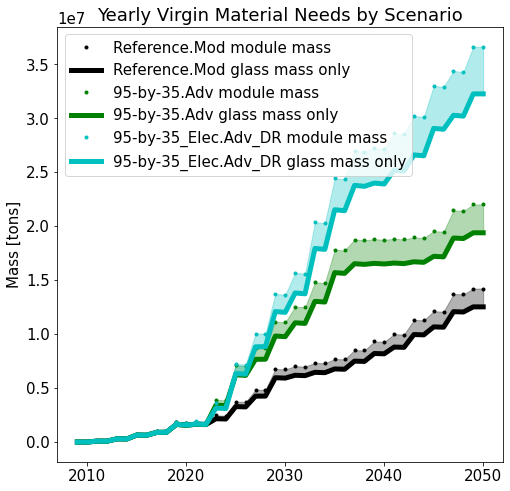

In [123]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

fig, ax = plt.subplots()

# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label=obj.name+' glass mass only')
ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 2
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
plt.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label=obj.name+' module mass')
plt.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label=obj.name+' glass mass only')

ax.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

# color = 'C1'
plt.legend()
plt.title('Yearly Virgin Material Needs by Scenario')
plt.ylabel('Mass [tons]')
    
    

#### Organizing Cumulative 2050 material needs for Materials / Scenarios

In [147]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (8, 8)
    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name][41])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

#### Calculating Bottoms for stacked bar plots... ugh.

In [214]:
dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']

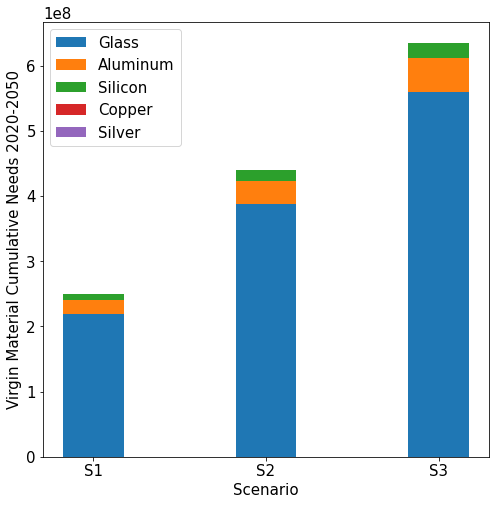

In [220]:
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = plt.bar(ind, dfcumulations2050['glass'], width)
p1 = plt.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = plt.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = plt.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = plt.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
             
plt.ylabel('Virgin Material Cumulative Needs 2020-2050')
plt.xlabel('Scenario')
plt.xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


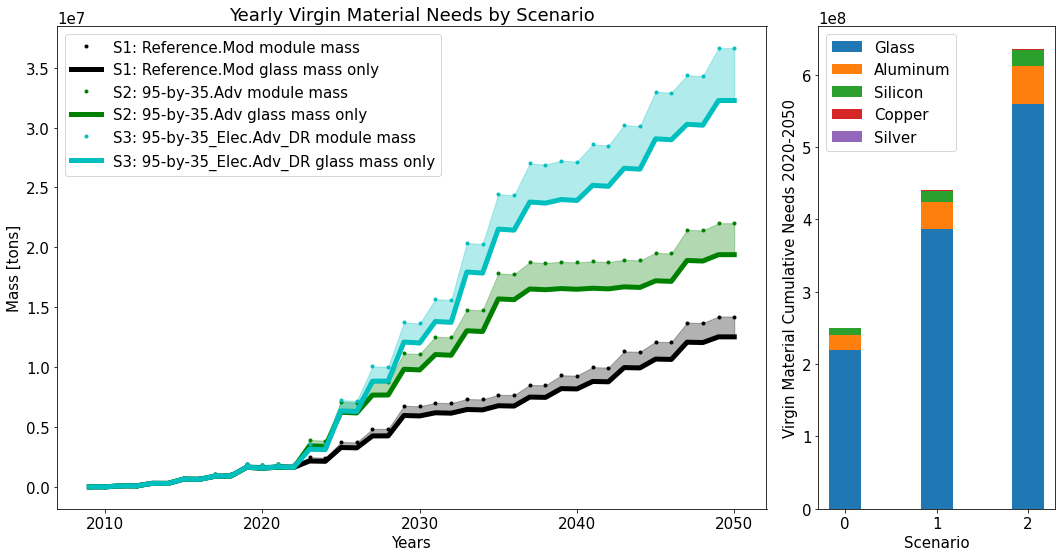

In [229]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']



f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: '+obj.name+' glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Virgin Material Needs by Scenario')
a0.set_ylabel('Mass [tons]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['VirginStock_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name][41])
    cumulations2050[materials[icumulations2050i]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
             
a1.set_ylabel('Virgin Material Cumulative Needs 2020-2050')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


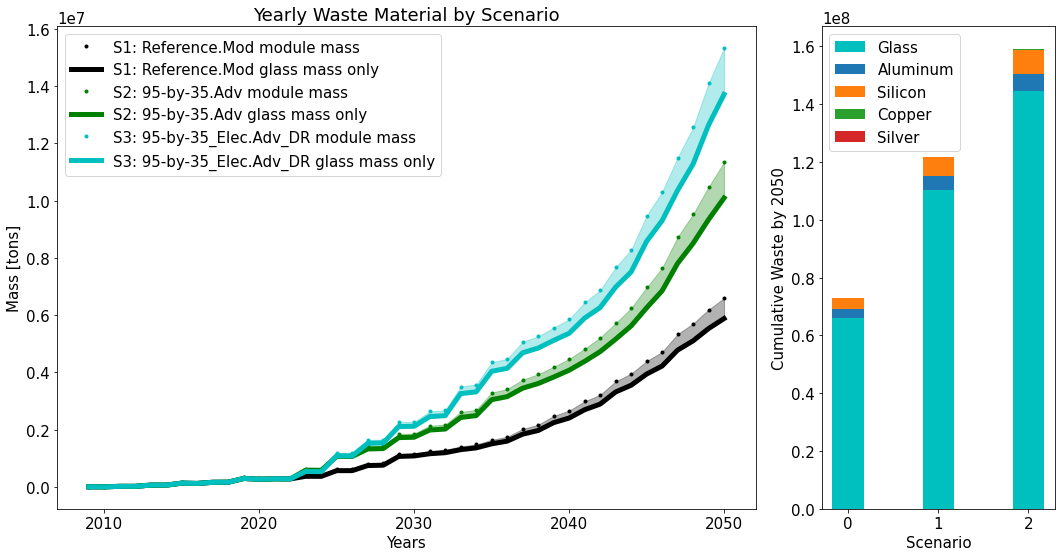

In [232]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (15, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']



f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'k.', linewidth=5, label='S1: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'k', linewidth=5, label='S1: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='k', alpha=0.3,
                 interpolate=True)

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g.', linewidth=5, label='S2: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'g', linewidth=5, label='S2: '+obj.name+' glass mass only')
a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='g', alpha=0.3,
                 interpolate=True)

# SCENARIO 3 ***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c.', linewidth=5, label='S3: '+obj.name+' module mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], glassmat, 'c', linewidth=5, label='S3: '+obj.name+' glass mass only')

a0.fill_between(obj.scenario[STATEs[0]].data['year'], glassmat, modulemat, color='c', alpha=0.3,
                 interpolate=True)

a0.legend()
a0.set_title('Yearly Waste Material by Scenario')
a0.set_ylabel('Mass [tons]')

a0.set_xlabel('Years')
    
    
########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name][41])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


## Plot BARS Stuff
ind=np.arange(3)
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])
             
a1.set_ylabel('Cumulative Waste by 2050')
a1.set_xlabel('Scenario')
a1.set_xticks(ind, ('S1', 'S2', 'S3'))
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

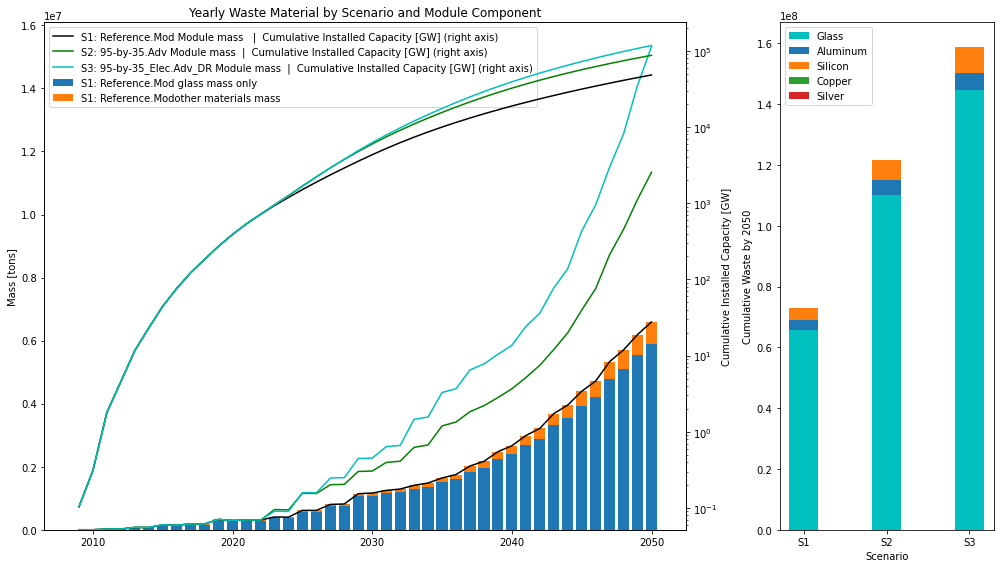

In [281]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['figure.figsize'] = (14, 8)
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

########################    
# SUBPLOT 1
########################
#######################
   
# Loop over Keywords
ii = 0 
keyw = keywords[ii]
# Loop over SF Scenarios

# loop plotting over scenarios

# SCENARIO 1 ***************
kk = 0
obj = SFScenarios[kk]

othermat = (USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
a0.bar(obj.scenario[STATEs[0]].data['year'], glassmat, label='S1: '+obj.name+' glass mass only')
a0.bar(obj.scenario[STATEs[0]].data['year'], othermat,bottom=glassmat, label='S1: '+obj.name+'other materials mass')
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat,'k', label='S1: '+obj.name+' Module mass   |  Cumulative Installed Capacity [GW] (right axis)')

# SCENARIO 2 ***************
kk = 1
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'g', label='S2: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



# SCENARIO 3***************
kk = 2
obj = SFScenarios[kk]

modulemat = (USyearly[keyw+materials[0]+'_'+obj.name]+USyearly[keyw+materials[1]+'_'+obj.name]+
            USyearly[keyw+materials[2]+'_'+obj.name]+USyearly[keyw+materials[3]+'_'+obj.name]+
            USyearly[keyw+materials[4]+'_'+obj.name])
glassmat = (USyearly[keyw+materials[0]+'_'+obj.name])
a0.plot(obj.scenario[STATEs[0]].data['year'], modulemat, 'c', label='S3: '+obj.name+' Module mass  |  Cumulative Installed Capacity [GW] (right axis)')



########################    
# SUBPLOT 2
########################
#######################
# Calculate    
keywords=['Waste_']
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

cumulations2050 = {}
for ii in range(0, len(materials)):
    matcum = []
    for kk in range (0, 3):
        obj = SFScenarios[kk]
        matcum.append(UScum[keyw+materials[ii]+'_'+obj.name][41])
    cumulations2050[materials[ii]] = matcum

dfcumulations2050 = pd.DataFrame.from_dict(cumulations2050)
dfcumulations2050

dfcumulations2050['bottom1'] = dfcumulations2050['glass']
dfcumulations2050['bottom2'] = dfcumulations2050['bottom1']+dfcumulations2050['aluminum']
dfcumulations2050['bottom3'] = dfcumulations2050['bottom2']+dfcumulations2050['silicon']
dfcumulations2050['bottom4'] = dfcumulations2050['bottom3']+dfcumulations2050['copper']


### Install Capacity

ax2=a0.twinx()
ax2.plot(obj.scenario[STATEs[0]].data['year'], UScum['Capacity_'+SFScenarios[0].name]/1e9, 'k', label='S1: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], UScum['Capacity_'+SFScenarios[1].name]/1e9, 'g', label='S2: Cumulative Installed Capacity [GW] (right axis)')
ax2.plot(obj.scenario[STATEs[0]].data['year'], UScum['Capacity_'+SFScenarios[2].name]/1e9, 'c', label='S3: Cumulative Installed Capacity [GW] (right axis)')
ax2.set_yscale('log')
ax2.set_ylabel('Cumulative Installed Capacity [GW]')

a0.set_ylabel('Mass [tons]')
a0.set_title('Yearly Waste Material by Scenario and Module Component')
a0.legend()
#ax2.legend()

## Plot BARS Stuff
ind=np.arange(3)+1
width=0.35 # width of the bars.
p0 = a1.bar(ind, dfcumulations2050['glass'], width, color='c')
p1 = a1.bar(ind, dfcumulations2050['aluminum'], width,
             bottom=dfcumulations2050['bottom1'])
p2 = a1.bar(ind, dfcumulations2050['silicon'], width,
             bottom=dfcumulations2050['bottom2'])
p3 = a1.bar(ind, dfcumulations2050['copper'], width,
             bottom=dfcumulations2050['bottom3'])
p4 = a1.bar(ind, dfcumulations2050['silver'], width,
             bottom=dfcumulations2050['bottom4'])

a1.set_ylabel('Cumulative Waste by 2050')
#a1.set_xticks(ind, ('S1', 'S2', 'S3'))
a1.set_xticks(ind)
a1.set_xticklabels(['S1','S2','S3'])
a1.set_xlabel('Scenario')
#plt.yticks(np.arange(0, 81, 10))
a1.legend((p0[0], p1[0], p2[0], p3[0], p4[0] ), ('Glass', 'Aluminum', 'Silicon','Copper','Silver'))

f.tight_layout()

# SAVE DATA FOR BILLY

### PCA vs. Cumulative Waste by 2050


In [32]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist = scenariolist/907185
scenariolist.to_csv('6 - STATE Cumulative2050 VirginMaterialNeeds_tons.csv')

In [34]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    
    materiallist = []
    for ii in range (0, len(materials)):    
        
        keywordsum = []
        for zz in range (0, len(STATEs)):
            keywordsum.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword].sum())
    
        materiallist.append(keywordsum)
    df = pd.DataFrame (materiallist,columns=STATEs, index = materials)
    df = df.T
    df = df.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , df], axis=1)

scenariolist.keys()
scenariolist.to_csv('7 - STATE Cumulative2050 Waste_tons.csv')

SFScenarios[kk].scenario[PCAs[zz]].data.year

Index 21 --> 2030

Index 31 --> 2040

Index 41 --> 2050

In [35]:
scenariolist.keys()

Index(['Reference.Mod_glass', 'Reference.Mod_silicon', 'Reference.Mod_silver',
       'Reference.Mod_copper', 'Reference.Mod_aluminum', '95-by-35.Adv_glass',
       '95-by-35.Adv_silicon', '95-by-35.Adv_silver', '95-by-35.Adv_copper',
       '95-by-35.Adv_aluminum', '95-by-35_Elec.Adv_DR_glass',
       '95-by-35_Elec.Adv_DR_silicon', '95-by-35_Elec.Adv_DR_silver',
       '95-by-35_Elec.Adv_DR_copper', '95-by-35_Elec.Adv_DR_aluminum'],
      dtype='object')

In [44]:
keyword='mat_Virgin_Stock'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/907185
scenariolist.to_csv('8 - STATE Yearly 2030 2040 2050 VirginMaterialNeeds_tons.csv')

In [45]:
keyword='mat_Total_Landfilled'
materials = ['glass', 'silicon', 'silver', 'copper', 'aluminum']

SFScenarios = [r1, r2, r3]
# Loop over SF Scenarios

scenariolist = pd.DataFrame()
for kk in range(0, 3):
    # Loop over Materials
    materiallist = pd.DataFrame()

    for ii in range (0, len(materials)):    
        
        keywordsum2030 = []
        keywordsum2040 = []
        keywordsum2050 = []

        for zz in range (0, len(STATEs)):
            keywordsum2030.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][21])
            keywordsum2040.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][31])
            keywordsum2050.append(SFScenarios[kk].scenario[STATEs[zz]].material[materials[ii]].materialdata[keyword][41])
    
        yearlylist = pd.DataFrame([keywordsum2030, keywordsum2040, keywordsum2050], columns=STATEs, index = [2030, 2040, 2050])
        yearlylist = yearlylist.T
        yearlylist = yearlylist.add_prefix(materials[ii]+'_')
        materiallist = pd.concat([materiallist, yearlylist], axis=1)
    materiallist = materiallist.add_prefix(SFScenarios[kk].name+'_')
    scenariolist = pd.concat([scenariolist , materiallist], axis=1)

scenariolist = scenariolist/907185
scenariolist.to_csv('9 - STATE Yearly 2030 2040 2050 Waste_tons.csv')